In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [3]:
(xtrain , ytrain) , (xtest , ytest) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
xtrain[1].shape

(28, 28)

Text(0.5, 1.0, 'digit = 0')

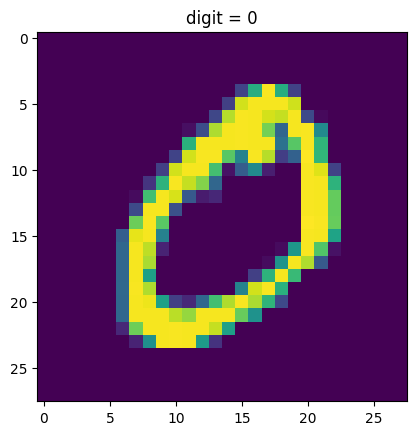

In [7]:
plt.imshow(xtrain[1])
plt.title(f"digit = {ytrain[1]}" )

In [9]:
xtrain,xtest = xtrain/255 , xtest/255

In [10]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100,activation = 'relu'),
    tf.keras.layers.Dense(50,activation = 'relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')
])

In [11]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [23]:
model.fit(xtrain,ytrain,epochs = 10,verbose = 1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9594 - loss: 0.1375
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9611 - loss: 0.1307
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9632 - loss: 0.1241
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9645 - loss: 0.1198
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9652 - loss: 0.1165
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9672 - loss: 0.1101
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9690 - loss: 0.1060
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9691 - loss: 0.1011
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9737 - loss: 0.0915
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9719 - loss: 0.0920


In [24]:
test_loss, test_accuracy = model.evaluate(xtest, ytest, verbose=1)
print(f"test_loss = {test_loss}")
print(f"test_accuracy = {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9610 - loss: 0.1282
test_loss = 0.11382211744785309
test_accuracy = 0.9650999903678894


In [25]:
#CLASSIFICATION REPORT ON TEST DATA
y_pred = model.predict(xtest)
y_pred_classes = y_pred.argmax(axis=1)
print(classification_report(ytest, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.96      0.96      0.96      1032
           3       0.95      0.97      0.96      1010
           4       0.96      0.97      0.96       982
           5       0.97      0.94      0.96       892
           6       0.98      0.96      0.97       958
           7       0.97      0.96      0.96      1028
           8       0.95      0.96      0.95       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.96      0.96     10000
weighted avg       0.97      0.97      0.97     10000



In [26]:
#INCORRECT PREDICTIONS ON TEST DATA
misclassified_indices = [i for i, (true, pred) in enumerate(zip(ytest, y_pred_classes)) if true != pred]
count = len(misclassified_indices)
print(f"Total misclassified_indices are {count}")

Total misclassified_indices are 349


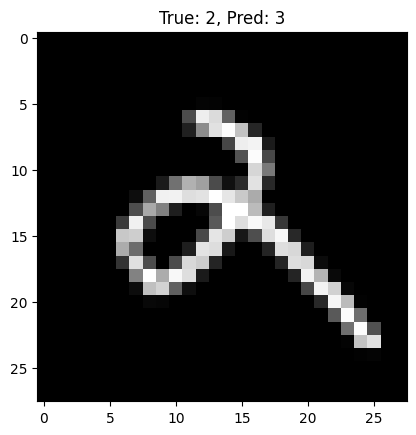

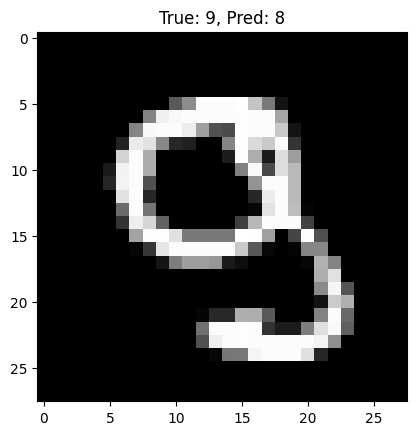

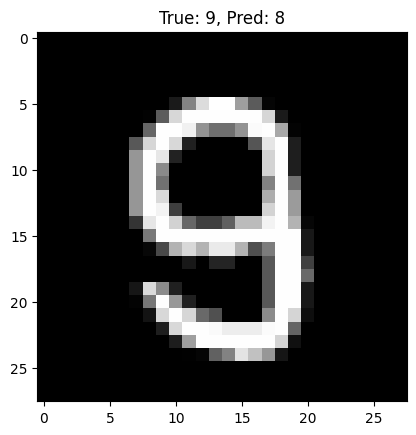

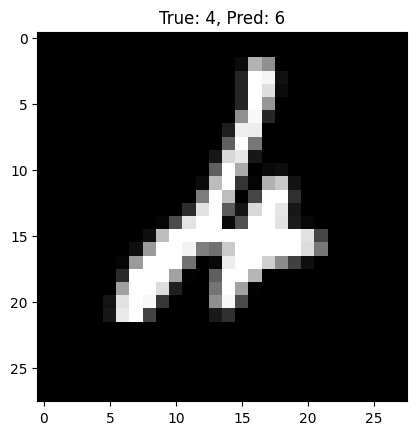

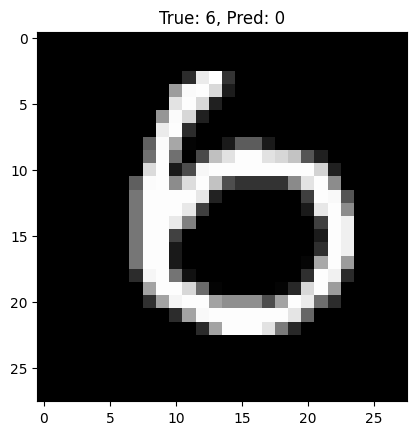

In [27]:
for index in misclassified_indices[:5]:
    plt.imshow(xtest[index].reshape(28, 28), cmap='gray')
    plt.title(f"True: {ytest[index]}, Pred: {y_pred_classes[index]}")
    plt.show()

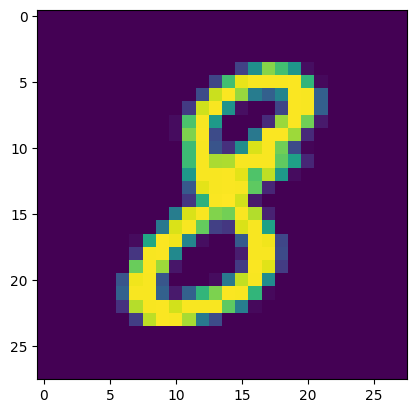

In [54]:
#predict the test data
plt.imshow(xtest[110])

In [56]:
predict = np.argmax(model.predict(xtest)[110])
print(f"Number present in the image is {predict}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Number present in the image is 8


In [41]:
#TESTING THE MODEL ON NEW DATA
test_image = tf.keras.preprocessing.image.load_img("new_image_path")
test_image = tf.image.rgb_to_grayscale(test_image)
test_image = tf.keras.preprocessing.image.img_to_array(test_image)

In [ ]:
test_image.shape

In [43]:
test_image = tf.image.resize(test_image,[28,28])

In [44]:
test_image = test_image.numpy().squeeze()
test_image.astype("float64")
test_image = test_image/255

In [ ]:
plt.imshow(test_image)

In [ ]:
v = np.argmax(model.predict(test_image.reshape(1,28,28)))
print(f"Number present in the image is {v}")